# Fill in the following table 

For each student in your group give the name, SNR and email address. Recall that you can do the assignment on your own or with a group of max three students.

Fill in the [Markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) below (with your real names etc.):

|name|SNR|email|
|----|---|-----|
|1. adam smith|1776|smith@nations.com|
|2. karl marx| 1887|marx@commu.ru|
|3. john m. keynes|1883|keynes@bloomsbury.uk|



### General Instruction:

Once you are finished with the notebook, rename the file to 'Assignment2_(surname of first team member).ipynb' (eg. Assignment2_Smith.ipynb) and email it to Gabriel Halm.

**IMPORTANT**: Only include one underscore in the filename.

For us to be able to replicate your results its important that the code also correcly runs with a `refreshed` Kernel. So after you are done make sure that you press `Kernel` (above) > `Restart & Run All`. This should produce the same output again. If not, you have forgotten to specify some objects in your code.


This assignment will be partially auto-graded. For this it is important that you fill in your code in the correct cells. For this replace the following 2 lines in each cell by your own code:
```python
# YOUR CODE HERE
raise NotImplementedError()
```

# Assignment 2 [26 points]

*Due on Monday, 11 May 2020* (noon, 12:01 at the latest)


# Competition and innovation

The competition authority (CA) in the Netherlands has recently learned about the relation between competition and innnovation. It is now convinced that more intense product market competition leads to more innovation. Hence, they want to increase innovation by lowering entry barriers. With lower entry barriers, more firms should enter the industry, competition intensity will go up and therefore innovation should increase as well, to the benefit of consumers.

As fledging economists, you are asked to advice the CA. You will try to understand whether more firms in the industry leads to more innovation and what the effects are on consumer welfare.

Technically speaking, it is important to understand fixed points for this assignment. Recall that we came across "fixed points" in a number of notebooks discussed in class.

As always, we import the following libraries. Note that this cell is read-only. To finish the assignment you do not need to import additional libraries. 

In [1]:
from scipy import optimize,arange
from numpy import array
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Two-stage game

We analyse a two stage game where in the first stage firms can invest $y$ in R&D to reduce their production costs. Then, with production costs given, firms compete in a Cournot game in the second stage.

We use backward induction to solve this game. That is, we solve for subgame-perfect equilibrium. Hence, we start with the Cournot subgame.

We start with an exogenously given vector of firm costs (in stage 1 firms can reduce these costs; see below). To make it simple to generate an "industry", we define the function `vector_firm_types`. This function has three arguments: `c_low`, the constant marginal cost level of the most efficient firm; `delta_c`, the next efficient firm has cost level `c_low + delta_c` etc. and there are `number` of firms in the industry. Play around with this function with different values for its three arguments to understand what it does.

The demand for firm $i\in \{1,2,...,n\}$ is given by $p_i = a - b Q - d q_i$ where $Q$ equals total output on the market and $p_i$ denotes the price of firm $i$. Where $n$ denotes the number of firms in the market. Here we use $a=2.0, b= 0.3, d = 0.7$. 

Note that for $d>0$ an increase in the quantity sold by a firm lowers its price by $b+d$ whereas an increase in the quantity of a competiting firm lowers the price only by $b$.

Firm $i$'s profits in the second stage with cost level $c_i$ are given by $\pi_i^{2nd} = ( a - (b+d) q_i - b Q_{others} - c_i)q_i$, where we use the notation $Q_{others} = \sum _{j \neq i} q_j$.

In [2]:
def vector_firm_types(c_low,delta_c,number):
    return [c_low + i * delta_c for i in range(number)]

def price(q_i,Q):
    return 2.0 - 0.3*Q - 0.7*q_i

def profit_2nd_stage(q_i, Q_others,c_i):
    return (price(q_i, q_i + Q_others) - c_i)*q_i

In [3]:
vector_firm_types(0.1,.01,5)

[0.1, 0.11, 0.12000000000000001, 0.13, 0.14]

### a) [2 points] Profits

Plot firm $i$'s profits (in the 2nd stage) as a function of $q_i$ for two different values of $Q_{others}$, say 0.2 and 0.6. How does the profit depend on $Q_{others}$? How does the profit maximizing value of $q_i$ depend on $Q_{others}$?

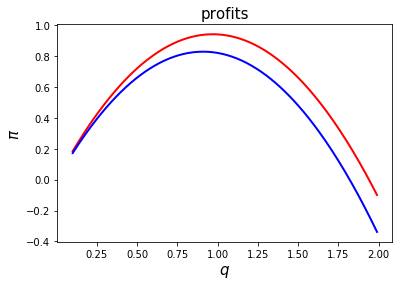

In [4]:
### BEGIN SOLUTION

range_q = arange(0.1,2.0,0.01)
range_profit1 = [profit_2nd_stage(q,0.2,0) for q in range_q]
range_profit2 = [profit_2nd_stage(q,0.6,0) for q in range_q]

plt.clf()
 
plt.plot(range_q, range_profit1,'-', color = 'r', linewidth = 2)
plt.plot(range_q, range_profit2,'-', color = 'b', linewidth = 2)

plt.title("profits",fontsize = 15)
plt.xlabel("$q$",fontsize = 15)
plt.ylabel("$\pi$",fontsize = 15,rotation = 90)
plt.show()

### END SOLUTION

### answer continued: 

1 point for the graph (if indeed it shows that higher $Q_{others}$ leads to lower profit maximizing $q$) and 1 point for the observation that a firm's optimal output level decreases in $Q_{others}$ and that profits depend negatively on $Q_{other}$. If a student mentions downward sloping reaction functions with Cournot or strategic substitutes, this is fine as well (earns 1 point). But they need to make one argument for why this is the case.

## reaction functions and fixed point

The function `reaction` determines firm $i$'s optimal output level as a response to the vector of (all) firms' output levels. The other arguments of the function are the identifier of the firm, $i$ (whose reaction we want to know) and the cost levels of the firms in the industries, `firm_types`.

Google the scipy routine `optimize.fminbound` to understand what this does.

In [5]:
def reaction(vector_q,i,firm_types):
    
    #Note that this expression goes across multiple lines.
    q_firm_i =  optimize.fminbound(lambda x, 
                                   Q_others = sum(vector_q)-vector_q[i],
                                   c = firm_types[i]: -profit_2nd_stage(x,Q_others,c),
                                   0,1,full_output=1)
    
    if q_firm_i[1] > 0: # because of minus sign: fval > 0 implies that profit < 0: better produce nothing
        q_i = 0
    else:
        q_i = q_firm_i[0]
        
    return q_i

### b) [2 points] Reaction

Explain what the function `reaction` does **exactly**. That is, what is `q_firm_i[0]` and `q_firm_i[1]`, how are `Q_others` and cost level $c_i$ determined? Make sure that your explanation is understandable for someone who does not know what the functions involved do.

#### answer: 

Optimize.fminbound finds the minimum of a function $f(x)$ in an interval, here the interval $x \in [0,1]$. It returns a vector of values. The first (`q_firm_i[0]`) is the optimal value of $x$. The second (`q_firm_i[1]`) is the optimal value of the function $f$. As we are minimizing "minus profits", $f > 0$ implies that profits are negative and hence the firm is better off not producing anything [1 point]

For firm $i$, its costs are given by $c_i =$ `firm_types[i]`. We vary the output for firm $i$ ($x$ in the lambda function) and we determine $Q_{others}$ out of the vector `vector_q` by considering  `sum(vector_q)-vector_q[i]` [1 point]

Consider a duopoly where both firms have costs of $c=0.0$ (i.e. `firm_types` equal `vector_firm_types(0.0,0,2)`). The following code produces the graph of the reaction functions. Note that because of the symmetry of both firms we only need to calculate the reaction function once!

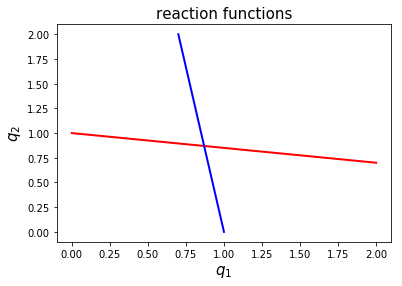

In [6]:
range_q = arange(0,2.1,0.1)
firm_1_reaction = [reaction([q0,0.1],1,vector_firm_types(0,0,2)) for q0 in range_q]

plt.clf()
 
plt.plot(range_q, firm_1_reaction,'-', color = 'r', linewidth = 2)
plt.plot(firm_1_reaction, range_q,'-', color = 'b', linewidth = 2)
plt.title("reaction functions",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.show()

### c) [2 points] Asymmetric Duopoly

Now consider a duopoly where both firms have different costs of $0.0$ and $0.5$, respectively (i.e. `firm_types` equal `vector_firm_types(0.0,0.5,2)`).

Make a graph with the two firms' reaction functions that shows the Cournot equilibrium. Discuss the difference with the symmetric case. Does each firm produce more or less in equilibrium? How would you know from the graph what happens to total equilibrium output?

[hint: What do you need to change in the function `reaction(...)` to output the reaction for the second firm?]

[hint: You may want to plot the original reaction function for both firms to better answer the question]

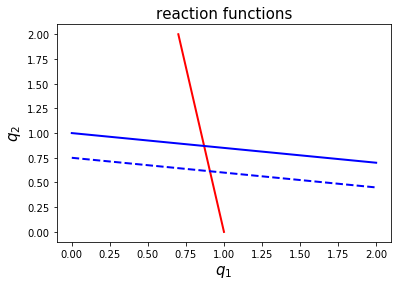

In [7]:
### BEGIN SOLUTION

range_q = arange(0,2.1,0.1)
firm_1_reaction = [reaction([0.1,q0],0,vector_firm_types(0.0,0.5,2)) for q0 in range_q]
firm_2_reaction = [reaction([q0,0.1],1,vector_firm_types(0.0,0.5,2)) for q0 in range_q]
firm_2_reaction_a = [reaction([q0,0.1],1,vector_firm_types(0.0,0.0,2)) for q0 in range_q]

plt.clf()
 
plt.plot(firm_1_reaction, range_q,'-', color = 'r', linewidth = 2)
plt.plot(range_q, firm_2_reaction,'--', color = 'b', linewidth = 2)
plt.plot(range_q, firm_2_reaction_a, '-', color = 'b', linewidth = 2)

plt.title("reaction functions",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.show()

### END SOLUTION

#### Answer

The increase in the cost of firm 2 lower its reaction function while not impacting the one of firm 1. So firm 2 will produce less. However, the equilibrium will feature an increase in q1 (we walk along the reaction function of 1). Total output is constant along an iso-quantity line of slope -1. Since the slope of the reaction function for firm 1 is more negative, total equilibrium output has to go down.

### d) [2 points] Fixed Point

In order numerically to solve for a Cournot equilibrium, we will need the function `fixed point` described below. Explain how this function can be used to find a Cournot equilibrium.

In [8]:
def fixed_point(vector_q,firm_types):
    
    firms = range(len(firm_types))
    vector_reaction = [reaction(vector_q,i,firm_types) for i in firms]
    
    return vector_q - vector_reaction

### answer

If we find the root of this function `fixed_point`, we have a vector $q$ such that firms' optimal reaction to $q$ equals $q$ itself: this fixed point of the best-response function is a Nash equilibrium. [1 point]



### e) [2 points] Equilibrium 2nd Stage

We compute the Cournot equilibrium by introducing the function'equilibrium_2nd_stage' below. As you can see, in the example below, 'equilibrium_2nd_stage(firm_types)' is equal to approximately `[0.87  0.87]`. How do you interpret this pair of numbers?

In [9]:
def equilibrium_2nd_stage(firm_types):
    
    x0 = array([0.1 for i in range(len(firm_types))])
    equil = optimize.root(fixed_point, x0, args=(firm_types), 
                          method='hybr', jac=None, tol=10**(-10), callback=None, options=None)
    return equil.x

firm_types = vector_firm_types(0,0,2)

print(equilibrium_2nd_stage(firm_types))

[0.86956522 0.86956522]


### answer

For two firms with $c=0$, at the Cournot equilibrium, each firm will produce approximately 0.87.

(The function `equilibrium_2nd_stage` finds the root of the function `fixed_point`. x0 is the starting point; the first guess for the fixed points tol is the level of precision required, the smaller the number the closer to the true solution the result will be.)

## first stage: R&D investments

Now we turn to the first stage where firms can invest to reduce their constant marginal costs. A firm of type $c_i$ that invests $y_i \in [0,2]$ in R&D reduces its costs of production to $\frac{c_i}{\exp(y_i)}$. The R&D cost of investing $y_i$ equals $0.2*y_i$.

In [20]:
def research_cost(y):
    
    return 0.2 * y

### f) [2 points] Plot the production costs $c_i/e^{y_i}$ as a function of $y_i$ for a high and low initial cost level $c_i$. (e.g. $0.5$ and $0.3$) Which firm has a higher benefit from investing into cost reduction? 

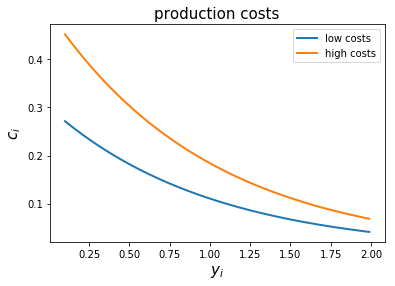

In [21]:
### BEGIN SOLUTION

range_y = arange(0.1,2.0,0.01)

range_prod_costs1 = [(0.3)/np.exp(y) for y in range_y]
range_prod_costs2 = [(0.5)/np.exp(y) for y in range_y]

plt.clf()
 
plt.plot(range_y, range_prod_costs1,'-', color = 'C0', linewidth = 2, label = 'low costs')
plt.plot(range_y, range_prod_costs2,'-', color = 'C1', linewidth = 2, label = 'high costs')

plt.title("production costs",fontsize = 15)
plt.xlabel("$y_i$",fontsize = 15)
plt.ylabel("$c_i$",fontsize = 15,rotation = 90)
plt.legend()
plt.show()

### END SOLUTION

#### Answer
We see that the high cost firm benefits more from cost reduction as the slope is steeper. (The trick here is that students might look at the level of cost resulting from investment and conclude that the low-cost firm benefits more from R&D. That is wrong. The change in cost in the releveant measure of marginal benefit.

### g) [2 points] Profits 1st stage

The following function computes the first-stage profit of a firm as a function of investments and types in subgame-perfect equilibrium. Why does it appeal to function 'profit_2nd_stage'? 

In [12]:
def profit_1st_stage(y_self,y,firm_self,firm_types):
    
    firms = range(len(firm_types))
    new_types = [firm_types[j]/np.exp(y[j]) for j in firms]
    
    new_types[firm_self] = firm_types[firm_self]/np.exp(y_self)
    
    vector_q = equilibrium_2nd_stage(new_types)
    q_other = sum(vector_q)-vector_q[firm_self]

    profits_firm_self = profit_2nd_stage(vector_q[firm_self], q_other, new_types[firm_self]) - research_cost(y_self)
    
    return profits_firm_self

### answer

In SPE, firms take into account that, once costs are determined in Stage 1, a Cournot equilibrium ensues in Stage 2, and that equilibrium determines the final payoff. So: 
- Given the initial costs `firm_types` and vector of investments `y`, we can calculate the production costs for each firm $j$ as `firm_types[j]/np.exp(y[j])`. This works for all firms, except the `firm_i` for which we are evaluating alternative investments `yi`; hence for this firm, we update `new_types[firm_i]` as `firm_types[firm_i]/np.exp(yi)`. 
- Then we calculate with the new cost levels given by `new_types` what the Cournot output levels are using the function `equilibrium_2nd_stage`. 
- With Cournot output vector `vector_q`, we can calculate profits in the first stage as the profits in the 2nd stage minus the `research_cost` for `firm_i`. 

The following function defines the reaction function for a firm $i$ out of the types given by `firm_types` when the vector of all firms' R&D is given by `vy`. To understand this function, you may want to refer back to the reaction function of the second stage above. Note, that we limit the range of $y\in[0,2]$.

In [13]:
def research_reaction(vy,i,firm_types):
    
    research_firm_i = optimize.fminbound(lambda x, 
                                         y = vy, 
                                         firm_i = i, 
                                         firm_types=firm_types: -profit_1st_stage(x,y,firm_i,firm_types),
                                         0,2,full_output=1)
    
    if research_firm_i[1] > 0: # because of minus sign: fval > 0 implies that research.profits < 0: better do nothing and produce nothing
        research_i = 0
    else:
        research_i = research_firm_i[0]
    
    return research_i

For you to understand the nature of strategic interaction, we consider two firms with initial costs $c_1 = c_ 2 = 1.0$. We plot the reaction functions of these firms, that is, the optimal value of $y_i$ as a function of $y_j$ for $y_j \in [0,2]$.

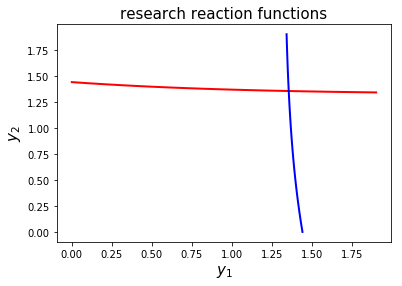

In [14]:
cost = 1.0

range_y = arange(0,2,0.1)
firm_1_research_reaction = [research_reaction([y0,0.1],1,[cost,cost]) for y0 in range_y]

plt.clf()
 
plt.plot(range_y, firm_1_research_reaction,'-', color = 'r', linewidth = 2)
plt.plot(firm_1_research_reaction, range_y,'-', color = 'b', linewidth = 2)
plt.title("research reaction functions",fontsize = 15)
plt.xlabel("$y_1$",fontsize = 15)
plt.ylabel("$y_2$",fontsize = 15,rotation = 90)
plt.show()

### END SOLUTION

The following function is used to find the fixed point for the function `research_reaction`.

In [15]:
def fixed_point_research(vector_y,firm_types):
    
    firms = range(len(firm_types))
    vector_reaction = [research_reaction(vector_y,i,firm_types) for i in firms]
    
    return array(vector_y) - array(vector_reaction)

### h) [2 points] Industry outcome - case 1

Consider an industry with two firms. Each firm initially has $c_1 = c_ 2 = 1.0$. 

Show that total R&D investments $y_1 + y_2$ equal `2.708` and total output in the second stage equals `1.515` (or so). Also, calculate the total R&D expenditures $c(y)$.

[hint: to find the equilibrium in the first stage, have a careful look at the function `equilibrium_2nd_stage` above. A combination of "copy-paste" and some thinking should give the answer here] 

In [16]:
### BEGIN SOLUTION

firm_types = vector_firm_types(1.0,0,2)

y0 = array([0.357 for i in range(len(firm_types))])
    
equil_y = optimize.root(fixed_point_research, y0, args=(firm_types), method='hybr', jac=None, tol=10**(-10), callback=None, options=None)

print(equil_y.x)
print("total R&D equals: ", sum(equil_y.x))
print("total R&D costs: ", sum([research_cost(x) for x in equil_y.x]))
print("output is given by: ", equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))]))
print("total output equals: ", sum(equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))])))

### END SOLUTION

[1.35423602 1.35423602]
total R&D equals:  2.7084720430761404
total R&D costs:  0.5416944086152281
output is given by:  [0.75732851 0.75732851]
total output equals:  1.514657012238756


### i) [2 points] Industry outcome - Case 2

Calculate R&D efforts, total R&D efforts, total R&D costs and individual and total output produced by three firms with costs of $1.0$. Discuss the difference in the previous outcome with 2 firms: is having one more firm good for consumer welfare?

In [17]:
### BEGIN SOLUTION

firm_types = vector_firm_types(1.0,0,3)

y0 = array([0.357 for i in range(len(firm_types))])
    
equil_y = optimize.root(fixed_point_research, y0, args=(firm_types), method='hybr', jac=None, tol=10**(-10), callback=None, options=None)

print(equil_y.x)
print("total R&D equals: ", sum(equil_y.x))
print("total R&D costs: ", sum([research_cost(x) for x in equil_y.x]))
print("output is given by: ", equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))]))
print("total output equals: ", sum(equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))])))

### END SOLUTION

[1.22878727 1.22878727 1.22878727]
total R&D equals:  3.686361810344233
total R&D costs:  0.7372723620688466
output is given by:  [0.65667413 0.65667413 0.65667413]
total output equals:  1.9700223869407778


#### Answer

Individual efforts go down. Firms command less market share and can appropriate less of the benefit of reduced costs. Total efforts go up but that is irrelevant. 

Individual output goes down. Avg cost goes up => output goes down. However, Num of firms goes up and total output goes up: that is good for consumers who now enjoy a higher quantity and a lower price.

### j) Industry structure - Case 3

We now consider the case of an industry with asymmetric costs. First, calculate R&D efforts, total R&D efforts, total R&D costs and individual and total output produced by two firms with heterogeneous costs of $0.7$ and $1.0$ . How does the outcome differ from the one in h)?

In [18]:
### BEGIN SOLUTION

firm_types = vector_firm_types(0.7,0.3,2)

y0 = array([0.357 for i in range(len(firm_types))])
    
equil_y = optimize.root(fixed_point_research, y0, args=(firm_types), method='hybr', jac=None, tol=10**(-10), callback=None, options=None)

print(equil_y.x)
print("total R&D equals: ", sum(equil_y.x))
print("total R&D costs: ", sum([research_cost(x) for x in equil_y.x]))
print("output is given by: ", equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))]))
print("total output equals: ", sum(equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))])))
print("production costs equals: ", [firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))])

### END SOLUTION

[0.99756267 1.35423597]
total R&D equals:  2.3517986395566632
total R&D costs:  0.4703597279113326
output is given by:  [0.75732872 0.75732847]
total output equals:  1.5146571851302042
production costs equals:  [0.25814402526699826, 0.2581444489335313]


#### Answer

The low-cost firm invests less than, while the high cost firm invests the same amount as, in the symmetric case. In the end, both firms reach the same level of cost and produce the same quantity as in the symmetric duopoly. The reason is that the investment technology leads high-cost firms to invest more than low-cost firms in a way that exactly leads to equalized post-investment costs. 

### l) [2 points] Industry structure - Case 4

Calculate R&D efforts, total R&D efforts, total R&D costs and individual and total output produced by three firms with heterogeneous costs of $0.7, 1.0, 1.3$. Discuss the difference in the outcome to *j)*.How is the result different from the outcome in j)? Do consumers prefer facing three symmetric firms or three asymmetric firms (with the same average cost)?

In [19]:
### BEGIN SOLUTION

firm_types = vector_firm_types(0.7,0.3,3)

y0 = array([0.357 for i in range(len(firm_types))])
    
equil_y = optimize.root(fixed_point_research, y0, args=(firm_types), method='hybr', jac=None, tol=10**(-10), callback=None, options=None)

print(equil_y.x)
print("total R&D equals: ", sum(equil_y.x))
print("total R&D costs: ", sum([research_cost(x) for x in equil_y.x]))
print("output is given by: ", equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))]))
print("total output equals: ", sum(equilibrium_2nd_stage([firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))])))
print("production costs equals: ", [firm_types[i]/np.exp(equil_y.x[i]) for i in range(len(firm_types))])

### END SOLUTION

[0.87211051 1.22878735 1.49115119]
total R&D equals:  3.592049061305569
total R&D costs:  0.7184098122611138
output is given by:  [0.65667386 0.65667418 0.65667411]
total output equals:  1.9700221539970308
production costs equals:  [0.29264779476195985, 0.29264723982443835, 0.2926473650213223]


#### Answer

1. Total RnD efforts go down. The low cost firm invests less in RnD as it already has a cost advantage, the high cost firm needs to catch up. The intermediate firm invests slightly more than before, again to catch up. As the increase by the high cost is not enough to compensate for low cost. 
2. As the firms' costs are equal after  RnD we get to the same Cournot equilibrium and total output is unchanged.
3. Consumers are therefore indifferent.
That is not in the question but note that one gets to the same output for a low total R&D expenditures. So, from the point of view of total welfare, asymmetry is good.

### m) [2 points] Advice

On the basis of your analysis so far, give your advice to the CA: is it a good idea, from the point of view of ocnsumer welfare, to foster firm entry into the market?

#### answer 

We have shown that firm entry leads to higher output. Although each firm's R&D expenditures decrease and costs end up higher, the mere fact that there is one more firm more than conpensates and leads to higher output and lower price for consumers. So, yes, the model shows that the CA should foster entry if it cares only about consumer welfare. This is IN SPITE of entry reducing innovation!

### n) [2 points] Have you used the 'right' model to investigate the question, or is there something special about it, which  would make you question its robustness or validity?

#### Answer

The model is very special: any asymmetry in initial cost levels leads to differential R&D investments that bring all firms to the same cost level. As a result, total output depends only on the number of firms, not on the inital distribution of cost types. One should not base policy advice on the basis of such a model!